# My Reading Journey:  Insights from Goodreads Data

### Introduction
I joined Goodreads in 2019 to keep track of my reading adventures and even added a few books I’d read in previous years. Fast forward to today, my reading pace has picked up, and curiosity got the best of me—I started wondering about my reading habits and whether they reveal any interesting patterns or trends.

To satisfy my inner data geek, I exported my Goodreads data and, for an extra layer of analysis, manually added the authors’ genders where they weren’t already listed.

So, here it is—the story of my bookshelf, told through data! Let’s dive into the insights waiting to be uncovered.


To get started on analysing my reading data in Python, we will need some packages below:
- `pandas`: It is a data analysis and manipulation library that provides data structures and tools.
- `numpy`: It is a numerical computing library that provides support for large, multi-dimensional arrays and mathematical functions.
- `matplotlib.pyplot`: It is a plotting library for creating visualizations in Python.
- `seaborn`: It provides a high-level interface for drawing attractive and informative statistical graphics.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data
books = pd.read_csv('./data/goodreads_library_export.csv')

In [3]:
# Check NaNs and data types
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Book Id                     257 non-null    int64  
 1   Title                       257 non-null    object 
 2   Author                      257 non-null    object 
 3   Author l-f                  257 non-null    object 
 4   Additional Authors          160 non-null    object 
 5   ISBN                        257 non-null    object 
 6   ISBN13                      257 non-null    object 
 7   My Rating                   257 non-null    int64  
 8   Average Rating              257 non-null    float64
 9   Publisher                   254 non-null    object 
 10  Binding                     257 non-null    object 
 11  Number of Pages             257 non-null    int64  
 12  Year Published              255 non-null    float64
 13  Original Publication Year   232 non

In [4]:
# Review data
books.sample(5)

,Book Id,Title,Author,Author l-f,Additional Authors,ISBN,ISBN13,My Rating,Average Rating,Publisher,...,Date Added,Bookshelves,Bookshelves with positions,Exclusive Shelf,My Review,Spoiler,Private Notes,Read Count,Owned Copies,Author Gender
221,56654511,Beyaz Kitap,Han Kang,"Kang, Han",S. Göksel Türközü,"=""6050605653""","=""9786050605655""",5,3.82,April Yayıncılık,...,2024/01/09,NaN,NaN,read,NaN,NaN,NaN,1,0,F
37,34063376,Arafta,George Saunders,"Saunders, George",Niran Elçi,"=""6055060841""","=""9786055060848""",4,3.75,Delidolu Yayınları,...,2023/06/07,NaN,NaN,read,NaN,NaN,NaN,1,0,M
180,35249663,Inspired: How to Create Tech Products Customer...,Marty Cagan,"Cagan, Marty",NaN,"=""1119387507""","=""9781119387503""",0,4.24,John Wiley & Sons Inc,...,2024/12/07,NaN,NaN,read,NaN,NaN,NaN,1,0,M
185,216379291,Soğuk Ter,Boileau-Narcejac,"Boileau-Narcejac, Boileau-Narcejac","Pierre Boileau, Thomas Narcejac, Alev Özgüner","=""6254298058""","=""9786254298059""",5,3.79,Türkiye İş Bankası Kültür Yayınları,...,2024/11/22,NaN,NaN,read,NaN,NaN,NaN,1,0,M
50,18112791,Papazın Kızı,George Orwell,"Orwell, George",Niran Elçi,"=""""","=""9789752730403""",4,3.54,İthaki Yayınları,...,2023/12/04,NaN,NaN,read,NaN,NaN,NaN,1,0,M


In [5]:
# Change data types if needed
books['Date Read'] = pd.to_datetime(books['Date Read'])
books['Date Added'] = pd.to_datetime(books['Date Added'])

In [6]:
# Enter null in My Rating column instead of 0 to avoid giving incorrect information
books['My Rating'].replace(0, 'null', inplace= True)
books['My Rating'].unique()

array([4, 'null', 5, 3, 2], dtype=object)

In [7]:
# Filter the read books only (there may be to-read books still unread)
books = books[books['Read Count'] == 1]

### My Yearly Reading Journey

In [8]:
# Extract the year from date
books['Year Read'] = books['Date Read'].dt.year
books.sample(5)

,Book Id,Title,Author,Author l-f,Additional Authors,ISBN,ISBN13,My Rating,Average Rating,Publisher,...,Bookshelves,Bookshelves with positions,Exclusive Shelf,My Review,Spoiler,Private Notes,Read Count,Owned Copies,Author Gender,Year Read
60,175759330,Kairos.,Jenny Erpenbeck,"Erpenbeck, Jenny",Regaip Minareci,"=""9750760980""","=""9789750760983""",5,3.40,Can Yayınları,...,NaN,NaN,read,NaN,NaN,NaN,1,0,F,2025
52,27798767,Mürebbiye,Hüseyin Rahmi Gürpınar,"Gürpınar, Hüseyin Rahmi",NaN,"=""9752895026""","=""9789752895027""",4,3.76,Everest Yayınları,...,NaN,NaN,read,NaN,NaN,NaN,1,0,M,2023
165,45356875,Kaza Süsü,Eda İşler,"İşler, Eda",NaN,"=""9759959577""","=""9789759959579""",null,3.35,Dergah Yayınları,...,NaN,NaN,read,NaN,NaN,NaN,1,0,F,2020
196,122763511,İlgi Arayışı,Adam Phillips,"Phillips, Adam",NaN,"=""6053141828""","=""9786053141822""",3,3.54,Ayrıntı Yayınları,...,NaN,NaN,read,NaN,NaN,NaN,1,0,M,2024
246,17284053,Nereye Gidiyoruz Baba?,Jean-Louis Fournier,"Fournier, Jean-Louis",Aslı Genç,"=""""","=""""",null,3.92,Yapı Kredi Yayınları,...,NaN,NaN,read,NaN,NaN,NaN,1,0,M,2023


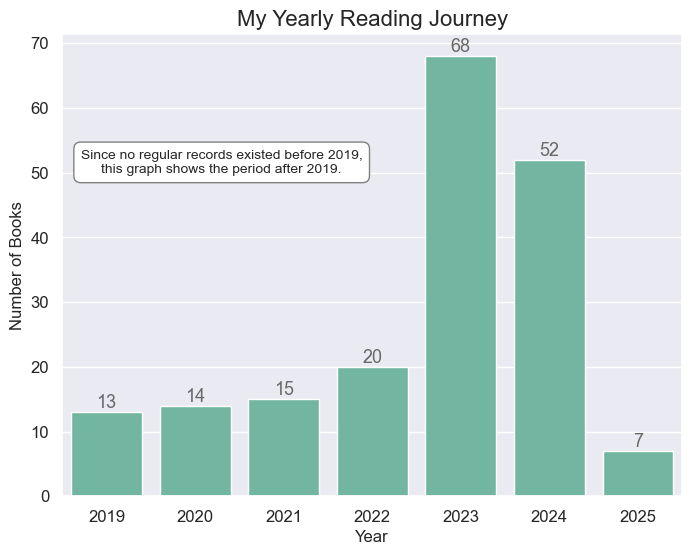

In [9]:
# I need this filter because of no regular data before 2019
yearly_books = books[books['Year Read'] > 2018].groupby('Year Read')['Book Id'].count().reset_index(name= 'Counts')

# Visualizing yearly readings
# Set the theme and size of the plot
plt.figure(figsize=(8,6))
sns.set_theme(style= 'darkgrid', palette='Set2')

# Create the plot, change the title
ax = sns.barplot(data= yearly_books, x= 'Year Read', y= 'Counts')
plt.title('My Yearly Reading Journey', fontsize= 16)

# Change labels and their settings
plt.xlabel('Year', fontsize= 12)
plt.xticks(fontsize= 12)
plt.ylabel('Number of Books', fontsize= 12)
plt.yticks(fontsize= 12)

# Add a text annotation explaining the filter
plt.text(x= 1.3, y= 50, s= 'Since no regular records existed before 2019,\nthis graph shows the period after 2019.', fontsize= 10, ha= 'center',
        bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))

# Loop through containers and add annotations
for container in ax.containers:
    ax.bar_label(container, fontsize= 13, color= 'dimgray', label_type= 'edge')

# Show the plot
plt.show();

### How Generous Am I with My Ratings?

In [10]:
# Count each rating
my_ratings = books.groupby('My Rating')['My Rating'].count().reset_index(name= 'Counts')
my_ratings

,My Rating,Counts
0,2,2
1,3,12
2,4,53
3,5,42
4,null,144


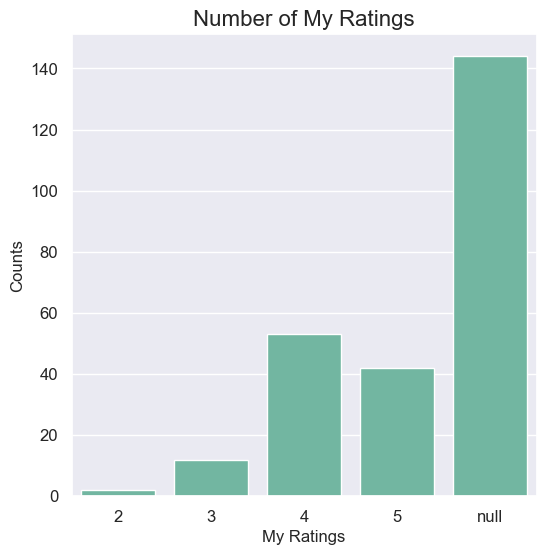

In [11]:
# Visualizing distribution of my rating
# Set the theme and size of the plot
plt.figure(figsize=(6,6))
sns.set_theme(style= 'darkgrid', palette='Set2')

# Create the plot, change the title
sns.barplot(data= my_ratings, x= 'My Rating', y= 'Counts')
plt.title('Number of My Ratings', fontsize= 16)

# Change labels and their settings
plt.xlabel('My Ratings', fontsize= 12)
plt.xticks(fontsize= 12)
plt.ylabel('Counts', fontsize= 12)
plt.yticks(fontsize= 12)

# Show the plot
plt.show();

### Do My Ratings Align with the Crowd?

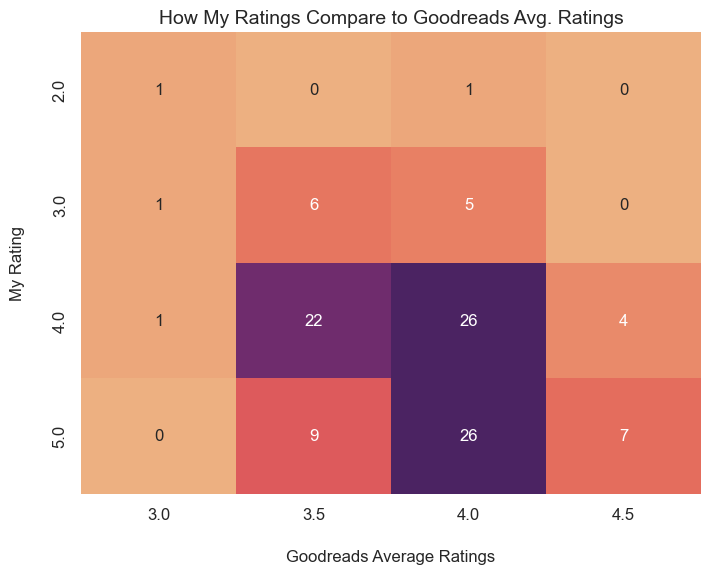

In [12]:
# Filter books have rating and fix data type
books_w_rating = books[books['My Rating'] != 'null'][['My Rating', 'Average Rating']].astype(float)

# Round the average ratings to interpret better
books_w_rating['Rounded Average Rating'] = np.round(books_w_rating['Average Rating'] * 2) / 2

# Count the occurrences of each My Rating-Avg Rating combination
unstacked_books_w_rating = books_w_rating.groupby(['My Rating', 'Rounded Average Rating']).size().unstack(fill_value= 0)

# Visualizing my rating vs. average ratings with a heatmap
# Set the theme and size of the plot
plt.figure(figsize=(8,6))
sns.set_theme(style= 'darkgrid', palette='Set2')

# Create the plot, change the title
sns.heatmap(data = unstacked_books_w_rating, cmap= 'flare', annot= True, fmt= 'd', cbar= False)
plt.title('How My Ratings Compare to Goodreads Avg. Ratings', fontsize= 14)

# Change labels and their settings
plt.xlabel('Goodreads Average Ratings', fontsize= 12, labelpad=20)
plt.xticks(fontsize= 12)
plt.ylabel('My Rating', fontsize= 12, labelpad=20)
plt.yticks(fontsize= 12)

# Show the plot
plt.show();

### How Long Are the Books I Read?

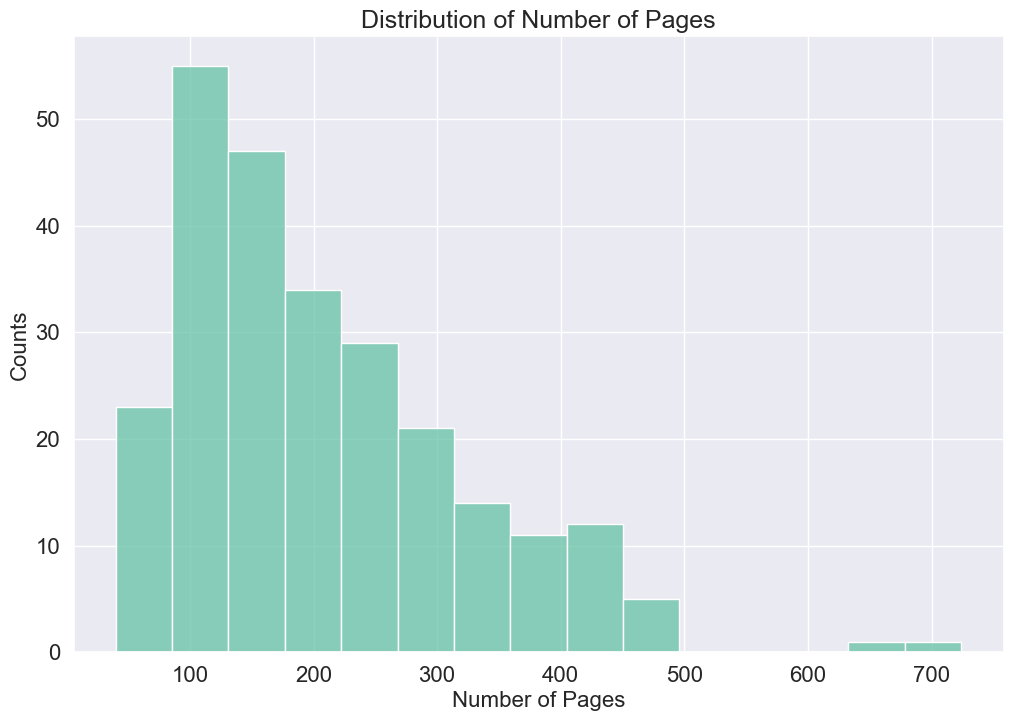

In [13]:
# Visualizing distribution of number of pages
# Set the theme and size of the plot
plt.figure(figsize=(12,8))
sns.set_theme(style= 'darkgrid', palette='Set2')

# Create the plot, change the title
sns.histplot(data= books['Number of Pages'])
plt.title('Distribution of Number of Pages', fontsize= 18)

# Change labels and their settings
plt.xlabel('Number of Pages', fontsize= 16)
plt.xticks(fontsize= 16)
plt.ylabel('Counts', fontsize= 16)
plt.yticks(fontsize= 16)

# Show the plot
plt.show();

### What were the shortest and longest books I've ever read?

In [14]:
# Finding the shortest and longest book I've read
shortest_book = books[books['Number of Pages'] == books['Number of Pages'].min()]['Title'].values[0]
shortest_page = round(books[books['Number of Pages'] == books['Number of Pages'].min()]['Number of Pages'].values[0])

longest_book = books[books['Number of Pages'] == books['Number of Pages'].max()]['Title'].values[0]
longest_page = round(books[books['Number of Pages'] == books['Number of Pages'].max()]['Number of Pages'].values[0])

print(f"The shortest book you've read is '{shortest_book}' with {shortest_page} pages.")
print(f"The longest book you've read is '{longest_book}' with {longest_page} pages.")

The shortest book you've read is 'Otel Paranoya' with 40 pages.
The longest book you've read is 'Tutunamayanlar' with 724 pages.


### Who Are My Most-Read Authors?

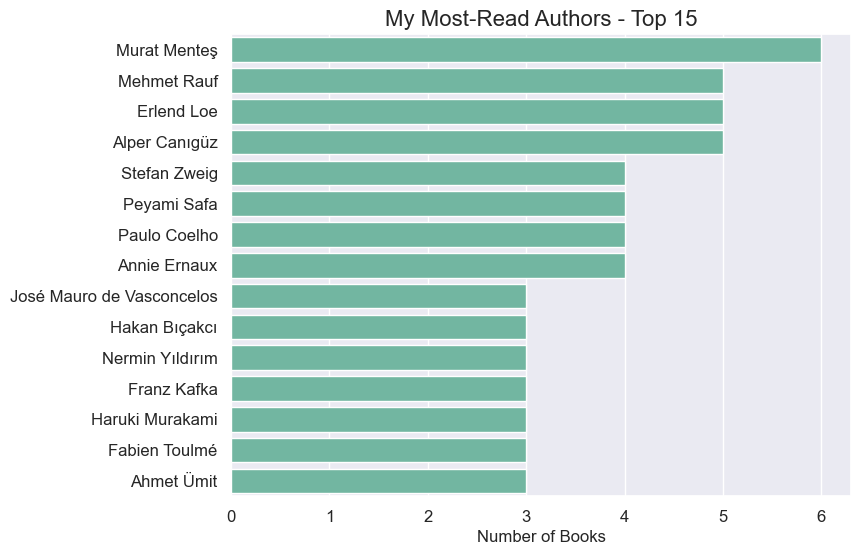

In [15]:
# Filter top N authors
n = 15
author_top_n = books.groupby('Author')['Book Id'].count().reset_index(name= 'Counts').sort_values('Counts', ascending= False).head(n)

# Visualizing top N authors
# Set the theme and size of the plot
plt.figure(figsize=(8,6))
sns.set_theme(style= 'darkgrid', palette='Set2')

# Create the plot, change the title
sns.barplot(data= author_top_n, x= 'Counts', y= 'Author')
plt.title(f'My Most-Read Authors - Top {n}', fontsize= 16)

# Change labels and their settings
plt.xlabel('Number of Books', fontsize= 12)
plt.xticks(fontsize= 12)
plt.ylabel('', fontsize= 12)
plt.yticks(fontsize= 12)

# Show the plot
plt.show();

### Gender Distribution of the Authors

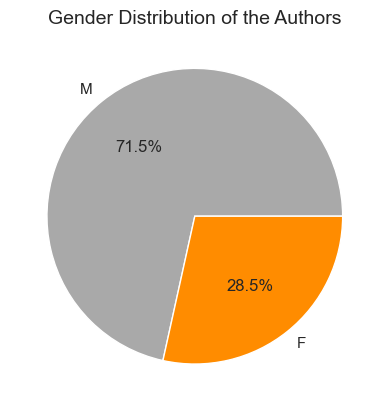

In [16]:
# Find percentages of gender
author_gender = books['Author Gender'].value_counts(normalize= True).reset_index(name= 'Percentage')

# Visualizing gender distribution of authors
# Create the plot, change the title
plt.pie(x= author_gender['Percentage'], labels= author_gender['Author Gender'], colors= ['darkgray', 'darkorange'], autopct='%1.1f%%')
plt.title('Gender Distribution of the Authors', fontsize= 14)

# Show the plot
plt.show();

### Top 10 Publishers on My Shelf

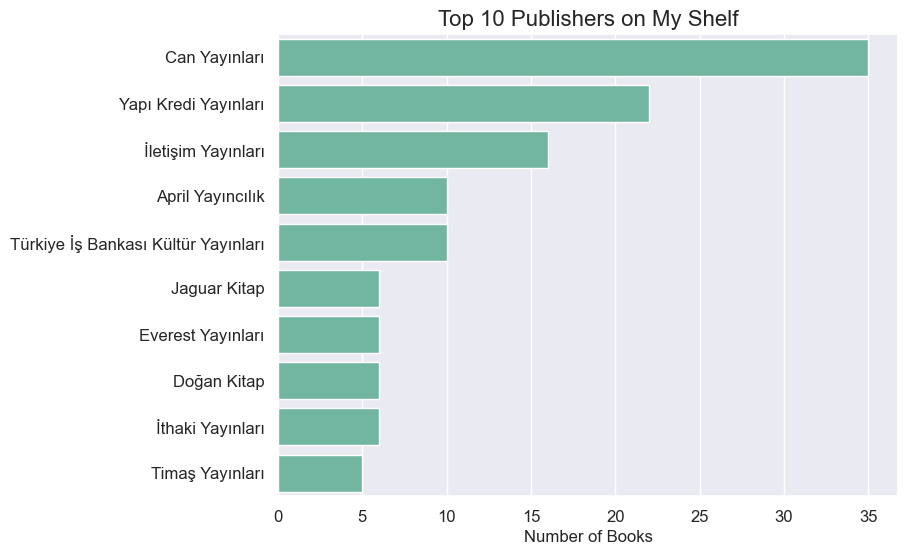

In [17]:
# Filter top 10 publishers
publisher_top_10 = books.groupby('Publisher')['Book Id'].count().reset_index(name= 'Counts').sort_values('Counts', ascending= False).head(10)

# Visualizing top 10 publishers
# Set the theme and size of the plot
plt.figure(figsize=(8,6))
sns.set_theme(style= 'darkgrid', palette='Set2')

# Create the plot, change the title
sns.barplot(data= publisher_top_10, x= 'Counts', y= 'Publisher')
plt.title('Top 10 Publishers on My Shelf', fontsize= 16)

# Change labels and their settings
plt.xlabel('Number of Books', fontsize= 12)
plt.xticks(fontsize= 12)
plt.ylabel('', fontsize= 12)
plt.yticks(fontsize= 12)

# Show the plot
plt.show();

### What Book Formats Do I Really Love?

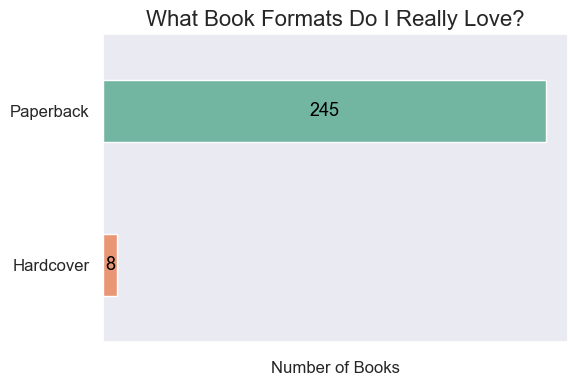

In [18]:
# Visualizing top 10 publishers
# Set the theme and size of the plot
plt.figure(figsize=(6,4))
sns.set_theme(style= 'dark', palette='Set2')

# Create the plot, change the title
ax = sns.countplot(data= books, y= 'Binding', hue= 'Binding', width= 0.4)
plt.title('What Book Formats Do I Really Love?', fontsize= 16)

# Loop through containers and add annotations
for container in ax.containers:
    ax.bar_label(container, fontsize= 13, color= 'black', label_type= 'center')

# Change labels and their settings
plt.xlabel('Number of Books', fontsize= 12)
ax.set(xticklabels=[])
plt.ylabel('', fontsize= 12)
plt.yticks(fontsize= 12)

# Show the plot
plt.show();